In [28]:
import pandas as pd


In [29]:
# Reading the TSV file
chipotle_df = pd.read_csv('chipotle.tsv', sep='\t')
chipotle_df.head()

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,$2.39
1,1,1,Izze,[Clementine],$3.39
2,1,1,Nantucket Nectar,[Apple],$3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,$2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$16.98


In [2]:
# Quantity of each item
item_quantity = chipotle_df.groupby('item_name')['quantity'].sum()
item_quantity


item_name
6 Pack Soft Drink                         55
Barbacoa Bowl                             66
Barbacoa Burrito                          91
Barbacoa Crispy Tacos                     12
Barbacoa Salad Bowl                       10
Barbacoa Soft Tacos                       25
Bottled Water                            211
Bowl                                       4
Burrito                                    6
Canned Soda                              126
Canned Soft Drink                        351
Carnitas Bowl                             71
Carnitas Burrito                          60
Carnitas Crispy Tacos                      8
Carnitas Salad                             1
Carnitas Salad Bowl                        6
Carnitas Soft Tacos                       40
Chicken Bowl                             761
Chicken Burrito                          591
Chicken Crispy Tacos                      50
Chicken Salad                              9
Chicken Salad Bowl                       123


In [3]:
# Most ordered item in the choice_description column
most_ordered_choice_description = chipotle_df['choice_description'].value_counts().idxmax()
most_ordered_choice_description


'[Diet Coke]'

In [4]:
# Total items ordered
total_items_ordered = chipotle_df['quantity'].sum()
total_items_ordered


4972

In [5]:
# Converting item price to float and calculating revenue
chipotle_df['item_price'] = chipotle_df['item_price'].str.replace('$', '').astype(float)
revenue = (chipotle_df['quantity'] * chipotle_df['item_price']).sum()
revenue


39237.02

In [6]:
# Total orders made
total_orders = chipotle_df['order_id'].nunique()
total_orders


1834

In [7]:
# Average revenue amount per order
avg_revenue_per_order = revenue / total_orders
avg_revenue_per_order


21.39423118865867

In [8]:
# Different items sold
different_items_sold = chipotle_df['item_name'].nunique()
different_items_sold


50

In [9]:
# Checking for missing values
missing_values = chipotle_df.isnull().sum()
missing_values


order_id                 0
quantity                 0
item_name                0
choice_description    1246
item_price               0
dtype: int64

In [10]:
# Verifying data types
data_types = chipotle_df.dtypes
data_types


order_id                int64
quantity                int64
item_name              object
choice_description     object
item_price            float64
dtype: object

In [11]:
# Identifying duplicated entries
duplicated_entries = chipotle_df.duplicated().sum()
chipotle_df = chipotle_df.drop_duplicates()
duplicated_entries_after = chipotle_df.duplicated().sum()


In [13]:
# Checking for inconsistencies in Quantity and Item Price
inconsistent_quantities = chipotle_df['quantity'].value_counts()
inconsistent_prices = chipotle_df['item_price'].describe()


In [14]:
# Analyzing the Choice Description column
choice_description_analysis = chipotle_df['choice_description'].value_counts()


In [15]:
# Checking for special characters in text-based columns
special_characters_item_name = chipotle_df['item_name'].apply(lambda x: any(not c.isalnum() and c != ' ' for c in x))
special_characters_choice_description = chipotle_df['choice_description'].apply(lambda x: any(not c.isalnum() and c != ' ' for c in str(x)))


In [16]:
# Checking the integrity of Order ID
order_id_integrity = chipotle_df['order_id'].is_unique


In [17]:
# Standardizing the Item Name column
chipotle_df['item_name'] = chipotle_df['item_name'].str.lower().str.strip()


In [18]:
# Investigating relationships between Quantity and Item Price
quantity_price_relationship = chipotle_df[['quantity', 'item_price']].corr()


In [19]:
# Ensuring data integrity
data_integrity_check = chipotle_df.apply(lambda row: pd.notnull(row['quantity']) and pd.notnull(row['item_price']), axis=1).all()


In [20]:
# Converting to CSV if needed
chipotle_df.to_csv('cleaned_chipotle.csv', index=False)


In [21]:
# Encoding categorical data
chipotle_df_encoded = pd.get_dummies(chipotle_df, columns=['item_name', 'choice_description'])


In [22]:
# Ensuring consistency in units for Quantity and Item Price
chipotle_df['item_price'] = chipotle_df['item_price'].astype(float)
chipotle_df['quantity'] = chipotle_df['quantity'].astype(int)


In [23]:
# Displaying the cleaned data
print(chipotle_df.head())

   order_id  quantity                              item_name  \
0         1         1           chips and fresh tomato salsa   
1         1         1                                   izze   
2         1         1                       nantucket nectar   
3         1         1  chips and tomatillo-green chili salsa   
4         2         2                           chicken bowl   

                                  choice_description  item_price  
0                                                NaN        2.39  
1                                       [Clementine]        3.39  
2                                            [Apple]        3.39  
3                                                NaN        2.39  
4  [Tomatillo-Red Chili Salsa (Hot), [Black Beans...       16.98  


## Additional Analyses

### Top 10 Most Ordered Items

In [24]:
top_10_items = chipotle_df.groupby('item_name')['quantity'].sum().sort_values(ascending=False).head(10)
print(top_10_items)


item_name
chicken bowl                    752
chicken burrito                 584
chips and guacamole             501
steak burrito                   383
canned soft drink               340
chips                           227
steak bowl                      220
bottled water                   204
chips and fresh tomato salsa    130
canned soda                     124
Name: quantity, dtype: int64


### Revenue by Item

In [25]:
revenue_by_item = chipotle_df.groupby('item_name').apply(lambda x: (x['quantity'] * x['item_price']).sum()).sort_values(ascending=False)
print(revenue_by_item)


item_name
chicken bowl                             7961.65
chicken burrito                          6320.81
steak burrito                            4203.64
steak bowl                               2470.56
chips and guacamole                      2453.37
chicken salad bowl                       1506.25
chicken soft tacos                       1161.77
chips and fresh tomato salsa             1033.96
veggie burrito                           1002.27
veggie bowl                               901.95
barbacoa burrito                          885.50
carnitas bowl                             830.71
barbacoa bowl                             663.11
bottled water                             638.68
carnitas burrito                          616.33
canned soft drink                         590.00
chips                                     573.89
steak soft tacos                          554.55
chicken crispy tacos                      524.11
steak salad bowl                          391.15
carnitas s

### Distribution of Orders by Price

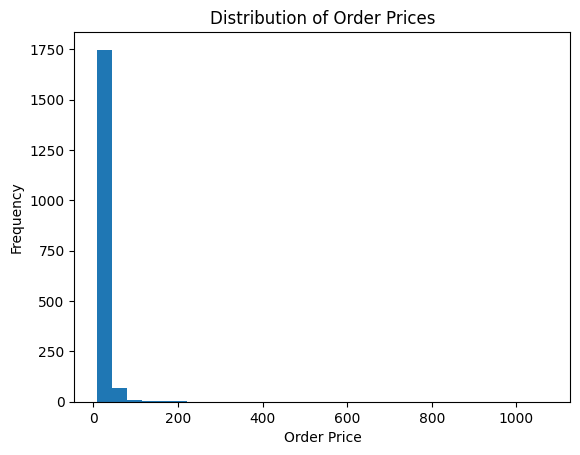

In [26]:
import matplotlib.pyplot as plt

order_prices = chipotle_df.groupby('order_id').apply(lambda x: (x['quantity'] * x['item_price']).sum())
plt.hist(order_prices, bins=30)
plt.title('Distribution of Order Prices')
plt.xlabel('Order Price')
plt.ylabel('Frequency')
plt.show()


### Analyzing the Effect of choice_description on item_price

In [27]:
avg_price_by_choice = chipotle_df.groupby('choice_description')['item_price'].mean().sort_values(ascending=False)
print(avg_price_by_choice)


choice_description
[[Fresh Tomato Salsa (Mild), Tomatillo-Green Chili Salsa (Medium), Roasted Chili Corn Salsa (Medium)], [Black Beans, Rice, Fajita Veggies, Cheese, Guacamole, Lettuce]]      32.940000
[Tomatillo Green Chili (Medium), [Rice, Black Beans, Sour Cream, Cheese]]                                                                                                    26.070000
[[Tomatillo-Green Chili Salsa (Medium), Roasted Chili Corn Salsa (Medium), Tomatillo-Red Chili Salsa (Hot)], [Black Beans, Rice, Cheese, Sour Cream, Guacamole, Lettuce]]    22.960000
[Tomatillo Green Chili Salsa, [Black Beans, Sour Cream, Cheese, Lettuce, Guacamole]]                                                                                         22.500000
[Fresh Tomato Salsa, [Rice, Fajita Vegetables, Black Beans, Sour Cream, Cheese, Lettuce, Guacamole]]                                                                         22.500000
                                                                  